In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv("canada.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [4]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [5]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

In [6]:
X = df[["year"]]

In [7]:
y = df["per capita income (US$)"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression 

In [11]:
model = LinearRegression()

In [12]:
model.fit (x_train, y_train)

LinearRegression()

In [13]:
y_train_pred = model.predict (x_train)
y_train_pred

array([ 6791.69193528,  2715.97937023,  5161.40690926, 32876.25235156,
       27170.2547605 , 10867.40450032, 14127.97455236, 36136.8224036 ,
       12497.68952634,  7606.83444829, 13312.83203935, 23909.68470847,
       26355.11224749, 36951.96491661,   270.55183121, 25539.96973448,
       24724.82722147,  4346.26439625,  9237.1194743 , 27985.39727351,
        1085.69434421, 33691.39486457, 17388.54460439,  1900.83685722,
       28800.53978652, 19018.82963041, 30430.82481254,  8421.9769613 ,
       18203.6871174 , 14943.11706537, 37767.10742962, 16573.40209138,
        5976.54942227, 34506.53737758, 11682.54701333, 23094.54219546,
       31245.96732555])

In [14]:
y_test_pred = model.predict (x_test) 
y_test_pred

array([22279.39968245, 32061.10983855, 21464.25716944, 35321.67989059,
       19833.97214342, 29615.68229953, 10052.26198731, 15758.25957838,
        3531.12188324, 20649.11465643])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
print("MSE (Train):", mean_squared_error(y_train, y_train_pred))

MSE (Train): 15601711.08501044


In [17]:
print("MSE (Test):", mean_squared_error(y_test, y_test_pred))

MSE (Test): 15147815.5477862


In [18]:
print("r2 (Train):", r2_score(y_train, y_train_pred))

r2 (Train): 0.8933611556121918


In [19]:
print("r2 (train):", r2_score(y_test, y_test_pred))

r2 (train): 0.8751771396846304


In [20]:
from sklearn.datasets import load_iris

In [21]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

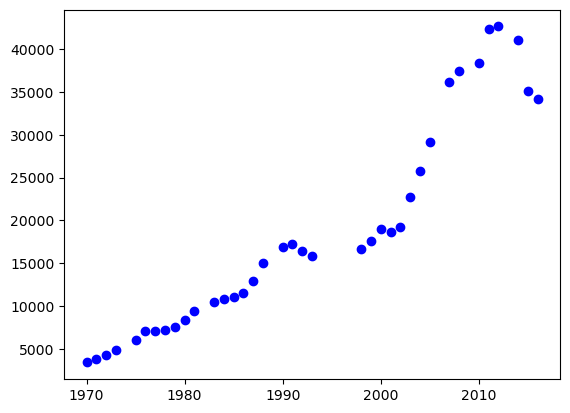

In [22]:
plt.scatter (x_train, y_train, color = "blue", label = "Train data")

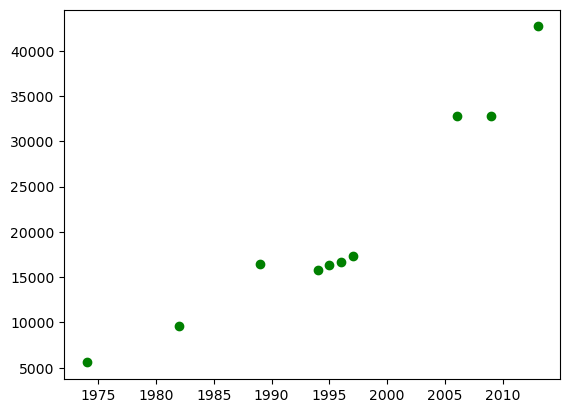

In [23]:
plt.scatter(x_test, y_test, color = "green", label = "Test data")

In [24]:
X_sorted = np.sort(X, axis=0)
y_pred_sorted = model.predict(X_sorted)

C:\Users\Director\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


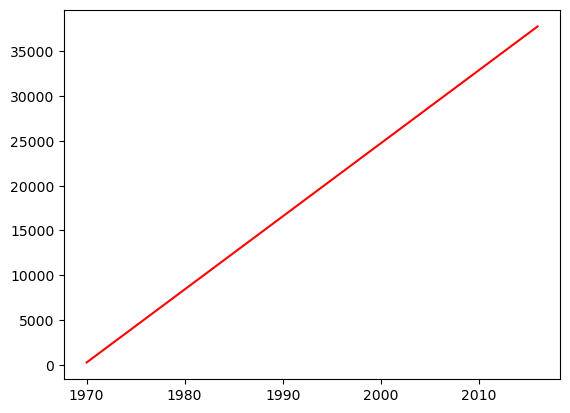

In [25]:
plt.plot(X_sorted, y_pred_sorted, color="red", label="Regression line")

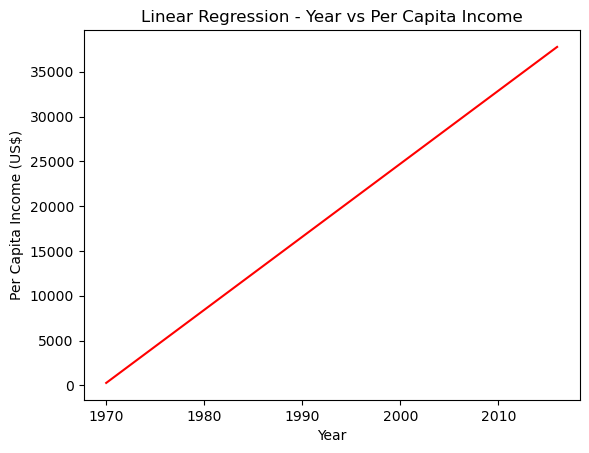

In [26]:
plt.plot(X_sorted, y_pred_sorted, color="red", label="Regression line")
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Linear Regression - Year vs Per Capita Income")
plt.show()

In [27]:
future_years = [[2025], [2030]]
future_predictions = model.predict(future_years)
print(future_predictions)

[45103.3900467  49179.10261174]


C:\Users\Director\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
pred_table = pd.DataFrame({
    "Year": [year[0] for year in future_years],
    "Predicted Income (US$)": future_predictions
})
pred_table

,Year,Predicted Income (US$)
0,2025,45103.390047
1,2030,49179.102612
